<a href="https://colab.research.google.com/github/Duarbert/SAD_DuarteSantos/blob/master/TPC5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



</br></br>

# Sistemas de Apoio à Decisão
#### TPC 5 - PARTE 1 DO TRABALHO FINAL (15 dias)

---------------


##### Com base no seu dataset (Determinado para a sua resolução do Trabalho final)

1. Catalogar o dataset quanto a
    1. Dimensionalidade
    - Esparsidade
    - Resolução
    - Tamanho


2. Catalogar todos as features (Máx 50), quanto a:
    1. valores de valores médios, variâncias,histogramas (crie um módulo que faça isto por si);
    - Tipo (contínuo, discreto ou binário)   
    - Analise NaN's (ou Nulls) e Outliers
    - Analise os resultados
    - Quais não fazem sentido em termos do problema que pretende resolver;
    - Que outras features poderia utilizar para enriquecer a informação do seu problema;
    - Perceba se deve ou não fazer encoding ou one hot encoding para cada feature discreta;
    - Faça uma matriz de correlação entre as features usando ```dataframe.corr()```;



3. Analise em termos estatísticos a Label/target que tem para já como problema.

---

No final, faça um pequeno texto relatando o dataset que está a utilzar, recorrendo à informação que obteve nas perguntas anteriores;


#Definição

Este dataset tem como objectivo classificar uma dada instância de um empregado de uma empresa como potêncial candidato a sair da empresa por variadíssimas razões.

*Attrition, in Human Resource terminology, refers to the phenomenon of the employees leaving the company. Attrition in a company is usually measured with a metric called attrition rate, which simply measures the no of employees moving out of the company (voluntary resigning or laid off by the company). Attrition Rate is also referred as churn rate or turnover.*

*High attrition is a cause of concern for a company as it presents a cost to the company. The company loses on the amount it spent to recruit and select these employees and to train them for their respective jobs. The company may also have to spend additional money to fill the vacancies left open by these employees. Hence it becomes critical for a company to keep a tab on the attrition rate which down-sizes the employee base.*

**Attrition Rate Formula**

Attrition Rate (%)= (Number of separations/ Number of employees) * 100

*Attrition rate gives an idea as to how many employees are leaving the company at any given time period. It is an important factor as companies have to prepare to start recruiting for the positions which are critical and cannot be left vacant.*

#Dependências#

In [0]:
#@title Montar a Google Drive em /content/gdrive
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
#@title Importar Módulos

import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#Carregar os Dados#

In [0]:
#@title Carregar o dataset e definir o índice

data = pd.DataFrame(pd.read_csv('/content/gdrive/My Drive/SAD/IBMHR.csv'))
data_orig = data.copy()
data.set_axis = 1
data.set_index('EmployeeNumber')

Random under-sampling:
1    225
0    225
Name: Attrition, dtype: int64


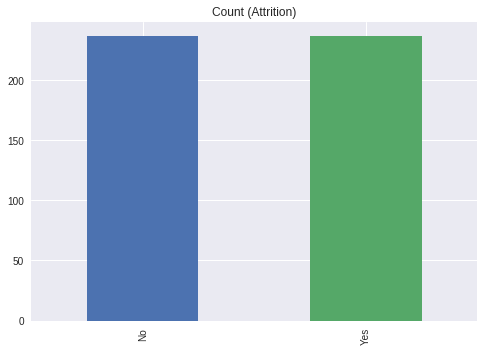

In [383]:
#@title Vamos proceder ao undersampling da classe Attrition

# Class count
count_class_0, count_class_1 = data.Attrition.value_counts()

# Divide by class
df_class_0 = data[data['Attrition'] == 'No']
df_class_1 = data[data['Attrition'] == 'Yes']

# Undersampling
df_class_0_under = df_class_0.sample(count_class_1)
data = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Attrition.value_counts())

data.Attrition.value_counts().plot(kind='bar', title='Count (Attrition)');

Random over-sampling:
No     1233
Yes    1233
Name: Attrition, dtype: int64


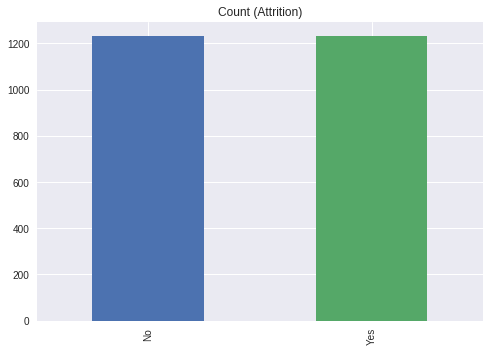

In [399]:
#@title Opção de oversampling

# Class count
count_class_0, count_class_1 = data.Attrition.value_counts()

# Divide by class
df_class_0 = data[data['Attrition'] == 'No']
df_class_1 = data[data['Attrition'] == 'Yes']

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
data = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(data.Attrition.value_counts())

data.Attrition.value_counts().plot(kind='bar', title='Count (Attrition)');

In [0]:
#@ Definir Subsets
data_social = data[['Age','Gender','MaritalStatus','RelationshipSatisfaction', 'WorkLifeBalance','DistanceFromHome','Education','EducationField','MonthlyIncome']].copy()
data_salary = data[['DailyRate','HourlyRate','MonthlyRate','PercentSalaryHike']].copy()
data_work = data[['Department','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobRole','JobSatisfaction','PerformanceRating','StockOptionLevel','OverTime']].copy()
data_work_hist = data[['TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].copy()

#Informação do Dataset - Raw

In [0]:
#@title Listar informação crua do dataset 
print('!!! A feature EmployeeNumber está a ser considerada como índice, pois não há nem faz sentido haver duplicados nesta feature !!!\n')
display(data.head())

pd.options.display.max_columns = None
data.columns = data.columns.str.strip()
print('\n')
data.info()

#1. Catalogar o dataset quanto a#
1. Dimensionalidade
- Esparsidade
- Resolução
- Tamanho

#2.2 Tipo (contínuo, discreto ou binário)

In [0]:
#@title Dimensionalidade, Esparsidade, Resolução, Tamanho. Tipo(contínuo, discreto ou binário)

print('Em termos de dimensionalidade, o dataset tem ' + str(len(data.columns)) + ' features / colunas.')
print('\n')

# As features do tipo objecto estão excluídas
for i in data.select_dtypes(exclude='object'):
    print ('\nA esparsidade de valores da feature',i, 'é de:\n', data[i].max()-data[i].min())

print('\nO tamanho(instâcias, features) é de: ' + str(data.shape))
print('\n')

print('Resolução do datset na seguinte tabela:\n')
dataRes = pd.DataFrame(pd.read_csv('/content/gdrive/My Drive/SAD/IBMHR_Features - Catalog.csv'))
display(dataRes)

#Pré-processamento dos Dados
- Remover feature irrelevantes
- Binarizar de forma básica os valores de Sim e Não
- 2.7  Onde Hot Encoding em features

In [400]:
#@title Remover features irrelevantes

print('As features StandardHours, Over18 e EmployeeCount são consideradas irrelevantes.')
print('\nA feature StandardHours tem sempre o mesmo valor de 8')
print('\nA feature Over18 tem sempre o mesmo valor de True')
print('\nA feature EmployeeCount tem sempre o mesmo valor de 1')

data = data.drop(['StandardHours', 'Over18', 'EmployeeCount'], axis=1)

As features StandardHours, Over18 e EmployeeCount são consideradas irrelevantes.

A feature StandardHours tem sempre o mesmo valor de 8

A feature Over18 tem sempre o mesmo valor de True

A feature EmployeeCount tem sempre o mesmo valor de 1


In [0]:
#@title Binarizar de forma básica, transformando valores de Sim e Não por valores inteiros 1 e 0

mapping = {'Yes':1, 'No':0, 'Female':1, 'Male':0}
data = data.replace(mapping)


In [0]:
#@title  One Hot Encoding com prefixo, pois iria originar features duplicadas
aaa = pd.get_dummies(data.BusinessTravel, prefix = 'BusinessTravel')
bbb = pd.get_dummies(data.Department, prefix = 'Department')
ccc = pd.get_dummies(data.JobRole, prefix = 'JobRole')
ddd = pd.get_dummies(data.MaritalStatus, prefix = 'MaritalStatus')
eee = pd.get_dummies(data.EducationField, prefix = 'EducationField')

values = [data, aaa, bbb, ccc, ddd, eee]

data = pd.concat(values,axis=1, join_axes=[data.index])

# Apagar colunas que foram one hotted

data = data.drop(['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus', 'EducationField'], axis = 1)

In [0]:
#@title Resumo do resultado da binarização básica e one-hot-encoding
data_pp = data
data_pp.info()
data_pp.head()

#2. Catalogar todos as features (Máx 50), quanto valores de:#
1. valores médios
- variâncias
- histogramas (crie um módulo que faça isto por si);

In [0]:
#@title Valores Estatísticos
# Easy mode:
# display(data.describe())


# Like a pro
values = [data.mean(), data.var(), data.std()]

result = pd.concat(values,axis=1, join_axes=[data.mean().index])

result.columns = ["Média","Variância","Desvio Padrão"]

result

In [0]:
#@title Histogramas - Gerados for função conforme requisito
#Função para geração dos histogramas.
# Usando a keyword 'All', corre todas as features

def plotHist(datasetVar, columnVar):
    if columnVar == 'All':
      for i in datasetVar.columns:
        if is_numeric_dtype(datasetVar[i]):
          display('You are about to see data from feature ' + i)
          datasetVar.hist(column = i, figsize=[12,4])
          plt.show()
          df3=data[i].groupby([data['Attrition']])
          plt.ylabel('Number of Workers')
          df3.plot(kind='hist', legend = True, title = i, alpha=0.5, figsize=[12,4])
          plt.show()
    else:
        if is_numeric_dtype(datasetVar[columnVar]):
          display('You are about to see data from feature ' + columnVar)
          datasetVar.hist(column = columnVar, figsize=[12,4])
          plt.show()
          df3=data[columnVar].groupby([data['Attrition']])
          plt.ylabel('Number of Workers')
          df3.plot(kind='hist', legend = True, title = columnVar, alpha=0.5, figsize=[12,4])
          plt.show()

plotHist(data,'All') 


#2.3 NaNs e Outliers##


In [0]:
#@title Valore Nulos
display('Existem ' + str(data_pp.isnull().sum().sum()) + ' valores nulos no dataset')
print('\n')

In [404]:
#@title Remoção de Outliers com 1º e 3º quantis de 0.05
Q1 = data_pp.quantile(0.05)
Q3 = data_pp.quantile(0.95)
IQR = Q3 - Q1

print('A dispersão estatística dos dados tendo em conta quantis min e max de 0.05\n\n', IQR)


data_pp_out = data_pp[~((data_pp < (Q1 - 1.5 * IQR)) |(data_pp > (Q3 + 1.5 * IQR))).any(axis=1)]
print('\nOutliers removidos e novo dataset criado com o nome data_pp_out')

A dispersão estatística dos dados tendo em conta quantis min e max de 0.05

 Age                                     32.00
Attrition                                1.00
DailyRate                             1259.75
DistanceFromHome                        25.00
Education                                3.00
EmployeeNumber                        1858.25
EnvironmentSatisfaction                  3.00
Gender                                   1.00
HourlyRate                              63.00
JobInvolvement                           3.00
JobLevel                                 3.00
JobSatisfaction                          3.00
MonthlyIncome                        14794.75
MonthlyRate                          22390.00
NumCompaniesWorked                       8.00
OverTime                                 1.00
PercentSalaryHike                       11.00
PerformanceRating                        1.00
RelationshipSatisfaction                 3.00
StockOptionLevel                         3.00
Tot

#2.6 As seguintes features poderiam enriquecer:
- Número de dias com falta por doença
- Número de dias com falta não justificada
- Avaliações de desempenho anuais

#2.8 Matriz de Correlação

In [0]:
data_pp_out.corr()

#3 Analise em termos estatísticos a Label/target que tem para já como problema

In [0]:
#@title Copiar a coluna de attrition para uma DF temporária

target_stat = data_pp_out.filter(['Attrition'], axis=1)

False: 1233
True: 1233
Proporção: 1.0 : 1


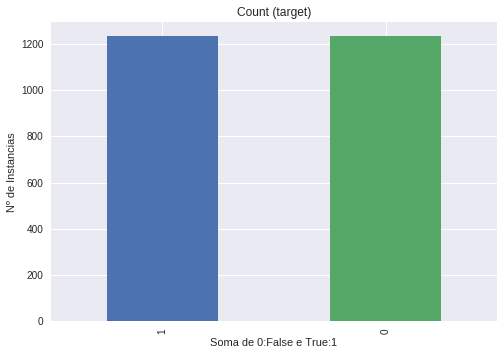

In [406]:
#@title Tendo em conta que é uma classificação binária, a análise irá se basear na soma e rácio de cada valor.

target_count = data.Attrition.value_counts()
print('False:', target_count[0])
print('True:', target_count[1])
print('Proporção:', round(target_count[0] / target_count[1], 2), ': 1')
plt.ylabel('Nº de Instancias')
plt.xlabel('Soma de 0:False e True:1')

target_count.plot(kind='bar', title='Count (target)');
plt.show()

In [0]:
data_pp_out_under.info()

In [0]:
#@title Esparsidade das features
for i in data_pp_out_under.select_dtypes(include='int64'):
    print ('O esparsidade de valores da feature ',i, 'é de', data_pp_out[i].max()-data_pp_out[i].min())

##2.5 À partida os dados atuais fazem sentido para o problema##

# TPC 6 - PARTE 2 DO TRABALHO FINAL (Último trabalho)

---------------


##### Com base no seu dataset (Determinado para a sua resolução do Trabalho final)

1. Aplicar 2 dos algoritmos dados nas aulas ao vosso dataset, para classificação/regressão/clustering, fazendo:
    1. Fazendo um split training set/test set;
    - Traçando a curva de aprendizagem do método tendo em conta uma modificação sucessiva do tamanho dos dados de treino;
    - Comparando os resultados dos algoritmos e mostrando o que melhor funciona;

***Caso Seja um Regressor***
- Apresentar RMSE dos dois métodos e comparar resultados;
- Rever feautures usadas e procurar melhorar o resultado obtido, testando mais/outras features;
    
***Caso Seja um Classificador***

- Escrever a matriz de confusao resultante da aplicação iterativa do método;
- Medir a sua Precisão e Recall;
- Definir um contexto de uso razoável do algoritmo e perceber se nessa situação é mais relevante a precisão ou o recall;
- De acordo com a métrica encontrada, rever feautures usadas e procurar melhorar o resultado obtido, testando mais/outras features;
    




#1. Aplicação de Algoritmos

In [0]:
#@title 1.1 Definir o Target e escolher as features

y = data_pp_out.pop('Attrition')

features = list(data_pp_out.columns[0:50])

X = data_pp_out[features]

###1.2.1 Decision Tree Classifier

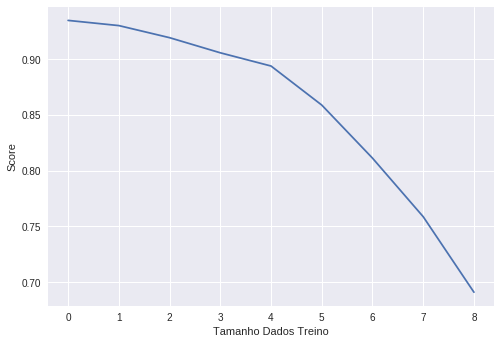

O score mais alto é de 0.9348837209302325 , com 0.1 de dados de teste e 0.9 de dados e treino.


Score de treino:  1.0
Score de teste:  0.9348837209302325


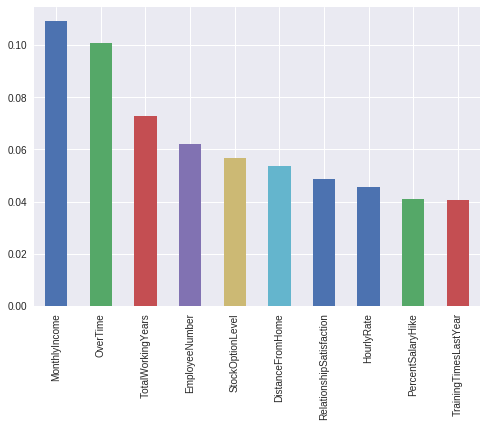

'A feature mais relevante para o resultado do algoritmo é:'

MonthlyIncome    0.109178
dtype: float64

In [408]:
#@title Traçando a curva de aprendizagem do método tendo em conta uma modificação sucessiva do tamanho dos dados de treino
score_dt = []
z = 0
k = 0
previous = 0

for i in range(1, 10):
  z = i/10
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = z, random_state = 5)
  #Decision Tree Classifier
  dt = DecisionTreeClassifier(random_state = 5)
  dt.fit(X_train, y_train)
  res_score = dt.score(X_test, y_test)
  score_dt.append(res_score)
  if(res_score > previous):
    previous = res_score
    k += 0.1

score_dt_local = score_dt
print('\n')
plt.plot(score_dt)
plt.ylabel('Score')
plt.xlabel('Tamanho Dados Treino')
plt.show()

score_dt_local = sorted(score_dt)
print('O score mais alto é de', score_dt_local[-1], ', com', k,'de dados de teste e', 1-k, 'de dados e treino.' )
print('\n')

#Decision Tree Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = k, random_state = 5)
dt = DecisionTreeClassifier(random_state = 5)
dt.fit(X_train, y_train)

print('Score de treino: ', dt.score(X_train, y_train))
print('Score de teste: ', dt.score(X_test, y_test))

# Relevância das top 10 features
rel_feature=pd.Series(dt.feature_importances_,X_test.columns).sort_values(ascending=False)
rel_feature.head(10).plot(kind='bar')
plt.show()

display('A feature mais relevante para o resultado do algoritmo é:',rel_feature.head(1))

###1.2.2 Random Forest Classifier

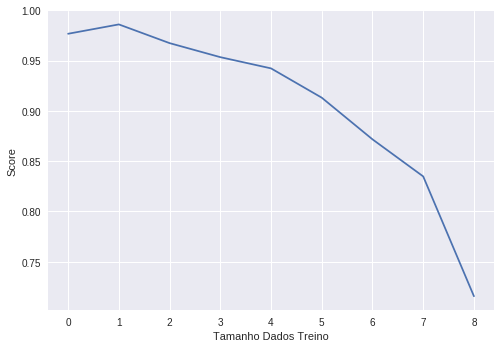

O score mais alto é de 0.986046511627907 , com 0.2 de dados de teste e 0.8 de dados e treino.


Score de treino:  1.0
Score de teste:  0.986046511627907


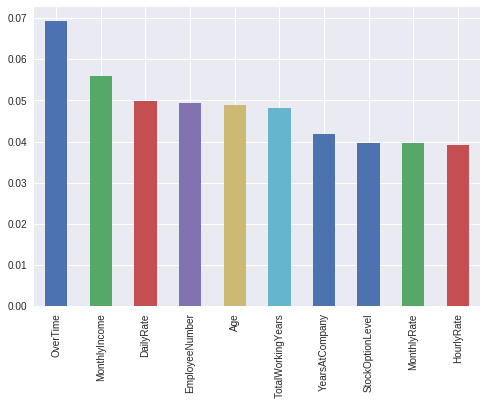

'A feature mais relevante para o resultado do algoritmo é:'

OverTime    0.069226
dtype: float64

In [409]:
#@title Traçando a curva de aprendizagem do método tendo em conta uma modificação sucessiva do tamanho dos dados de treino
# Random Forest
# !!!Perde-se traceability!!!

# Curva de aprendizagem
score_rf = []
z = 0
k = 0
previous = 0

for i in range(1, 10):
  z = i/10
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = z, random_state = 5)
  #Decision Tree Classifier
  rf=RandomForestClassifier(n_estimators=20, max_depth=100, random_state = 5)
  rf.fit(X_train, y_train)
  res_score = rf.score(X_test, y_test)
  score_rf.append(res_score)
  if(res_score > previous):
    previous = res_score
    k += 0.1


score_rf_local = score_rf  
print('\n')
plt.plot(score_rf_local)
plt.ylabel('Score')
plt.xlabel('Tamanho Dados Treino')
plt.show()

score_rf_local = sorted(score_rf)
print('O score mais alto é de', score_rf_local[-1], ', com', k,'de dados de teste e', 1-k, 'de dados e treino.' )
print('\n')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = k, random_state = 5)
rf=RandomForestClassifier(n_estimators=20, max_depth=100, random_state = 5)
rf.fit(X_train, y_train)
                                                                      
print('Score de treino: ', rf.score(X_train, y_train))
print('Score de teste: ', rf.score(X_test, y_test))

# Relevância das top 10 features
rel_feature=pd.Series(rf.feature_importances_,X_test.columns).sort_values(ascending=False)
rel_feature.head(10).plot(kind='bar')
plt.show()

display('A feature mais relevante para o resultado do algoritmo é:',rel_feature.head(1))

In [0]:
#@title 1.3 Comparação dos Métodos

plt.plot(score_dt, label='Decision Tree')
plt.plot(score_rf, label='Random Forest')
plt.ylabel('Score')
plt.xlabel('Tamanho Dados Treino')
plt.legend()
plt.show

# 2.1 Matriz Confusão

In [0]:
#@title Matrizes Confusão dos Decision Tree e Random Forest

def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

# Decision Tree
y_preds = dt.predict(X_test)

matrix = get_confusion_matrix(y_test, y_preds)
matrix

import itertools 
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix do Decicion Tree")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('\n', classification_report(y_test, y_preds))



print('\n\n')
#Random Forest
y_preds = rf.predict(X_test)

matrix = get_confusion_matrix(y_test, y_preds)
print(matrix)

import itertools 
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix do Random Forest")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('\n', classification_report(y_test, y_preds))